In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

In [80]:
from api_keys import weather_api_key
from citipy import citipy

# General Cities List

In [81]:
output_data_file = "output_data/cities.csv"
cities_wth = pd.read_csv(output_data_file)
cities_wth

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [82]:
lat_range =(-90,90)
lng_range =(-180,180)

In [83]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

616

# API Call

In [84]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#city_name = cities_wth["City"].tolist()

lat = []
lng = []
hum = []
contr = []
name = []
date = []
max_temp = []
wd_sp = []
cld = []

#print(json.dumps(response,indent=4))

for city in cities:
    try:
        print(f"Processing {city}.")
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        contr.append(response['sys']['country'])
        name.append(response['name'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        wd_sp.append(response['wind']['speed'])
        cld.append(response['clouds']['all'])
    except (KeyError):
        print("City no found. Skipping..")


Processing rikitea.
Processing kekri.
Processing saint-philippe.
Processing bluff.
Processing hobart.
Processing provideniya.
Processing albany.
Processing torbay.
Processing nikolskoye.
Processing mentok.
City no found. Skipping..
Processing barentsburg.
City no found. Skipping..
Processing tabas.
Processing cabedelo.
Processing kaitangata.
Processing tasiilaq.
Processing illoqqortoormiut.
City no found. Skipping..
Processing butaritari.
Processing cape town.
Processing bosaso.
Processing tsihombe.
City no found. Skipping..
Processing castro.
Processing vaini.
Processing taltal.
Processing cabo san lucas.
Processing colares.
Processing mataura.
Processing lebu.
Processing kabanjahe.
Processing milagres.
Processing hermanus.
Processing ilulissat.
Processing bokspits.
City no found. Skipping..
Processing saskylakh.
Processing kupang.
Processing puerto santander.
Processing husavik.
Processing mar del plata.
Processing ushuaia.
Processing taoudenni.
Processing labuhan.
Processing samarai

Processing mrirt.
City no found. Skipping..
Processing sao filipe.
Processing derzhavinsk.
Processing hami.
Processing batagay-alyta.
Processing arraias.
Processing chikoy.
City no found. Skipping..
Processing abnub.
Processing katsuura.
Processing tokzar.
City no found. Skipping..
Processing barawe.
City no found. Skipping..
Processing attawapiskat.
City no found. Skipping..
Processing talnakh.
Processing nizwa.
Processing camana.
City no found. Skipping..
Processing moba.
Processing merauke.
Processing kaltan.
Processing luderitz.
Processing iranshahr.
Processing limbang.
Processing nantucket.
Processing dondo.
Processing mezen.
Processing allende.
Processing pisco.
Processing samusu.
City no found. Skipping..
Processing tim.
Processing leh.
Processing sentyabrskiy.
City no found. Skipping..
Processing sangar.
Processing takoradi.
Processing olafsvik.
City no found. Skipping..
Processing sibiti.
Processing honningsvag.
Processing bogorodskoye.
Processing mirnyy.
Processing newton.
Pr

In [85]:
len(cities)

616

In [86]:
len(cld)

555

In [87]:
weather_dict = {
   "City": name,
    "Cloudiness": cld,
    "Country":contr,
    "Date": date,
    "Humidity": hum,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wd_sp
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1570048732,86,-23.12,-134.97,61.86,10.13
1,Kekri,0,IN,1570048981,82,25.97,75.15,75.30,6.42
2,Saint-Philippe,90,CA,1570048745,62,45.36,-73.48,55.00,12.75
3,Bluff,0,AU,1570048766,76,-23.58,149.07,62.32,14.56
4,Hobart,0,AU,1570048546,66,-42.88,147.33,53.01,9.17
...,...,...,...,...,...,...,...,...,...
550,Aswan,0,EG,1570048876,21,24.09,32.90,82.34,14.52
551,Abu Kamal,0,SY,1570049202,30,34.45,40.92,79.51,13.82
552,Palu,77,ID,1570049202,91,-0.90,119.87,72.51,3.78
553,Haapiti,20,PF,1570049202,65,-17.57,-149.87,80.60,4.70


In [88]:
weather_data.to_csv("Weather_Cities.csv",encoding="utf-8", index=False)

# Temperature(F) vs. Latitude

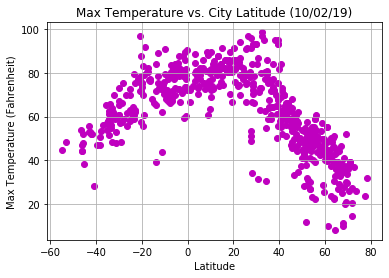

In [89]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",color="m")

plt.title("Max Temperature vs. City Latitude (10/02/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Max Temperature vs City Latitude")
plt.show()

# Humidity(%) vs. Latitude

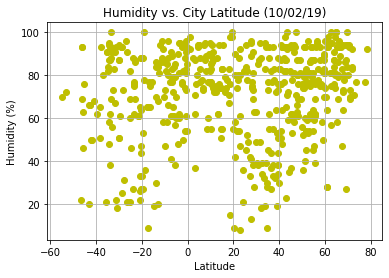

In [90]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",color="y")

plt.title("Humidity vs. City Latitude (10/02/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Humidity vs City Latitude.png")
plt.show()

# Cloudiness vs. Latitude

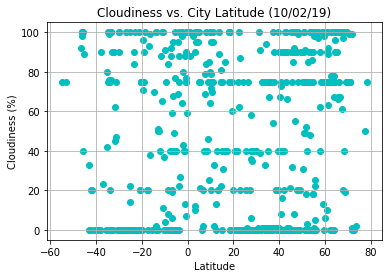

In [91]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",color="c")

plt.title("Cloudiness vs. City Latitude (10/02/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Cloudiness vs City Latitude.png")
plt.show()

# Wind Speed vs. Latitude

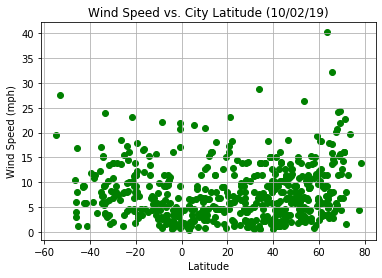

In [92]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",color="g")

plt.title("Wind Speed vs. City Latitude (10/02/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Wind Speed vs City Latitude.png")
plt.show()

# Northern Hemisphere: Temperature, Humidity, Cloudiness, Wind Speed against Latitude 

In [93]:
north_hem = weather_data.loc[(weather_data["Lat"] >= 0)]
north_hem = pd.DataFrame(north_hem)
north_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Kekri,0,IN,1570048981,82,25.97,75.15,75.30,6.42
2,Saint-Philippe,90,CA,1570048745,62,45.36,-73.48,55.00,12.75
5,Provideniya,75,RU,1570048766,81,64.42,-173.23,42.80,17.90
6,Albany,90,US,1570048644,87,42.65,-73.75,64.99,12.75
7,Torbay,90,CA,1570048832,80,47.66,-52.73,44.01,12.75
...,...,...,...,...,...,...,...,...,...
547,Genhe,100,CN,1570049201,79,50.78,121.52,28.38,3.40
549,Bafq,91,IR,1570048745,49,31.60,55.40,62.94,8.10
550,Aswan,0,EG,1570048876,21,24.09,32.90,82.34,14.52
551,Abu Kamal,0,SY,1570049202,30,34.45,40.92,79.51,13.82


# Northern Hemisphere -->Temperature vs. Latitude

1      71.769557
2      55.575285
5      39.656625
6      57.838641
7      53.654356
         ...    
547    51.048573
549    67.067456
550    73.339708
551    64.687173
554    76.212751
Name: Lat, Length: 378, dtype: float64
y = -0.84x +93.46
The r-squared is: -0.8136665984276874


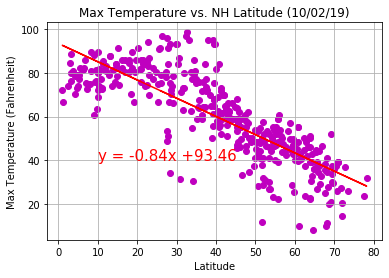

In [94]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature vs. NH Latitude (10/02/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Max Temperature vs NH Latitude.png")
plt.show()

# Northern Hemisphere --> Humidity vs. Latitude

The r-squared is: 0.09848193766234192


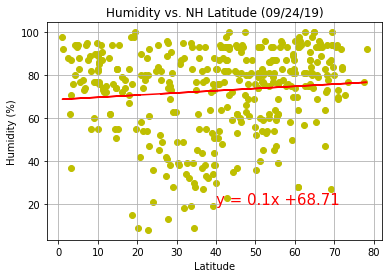

In [95]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. NH Latitude (09/24/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Humidity vs NH Latitude.png")
plt.show()

# Northern Hemisphere --> Cloudiness vs. Latitude

The r-squared is: 0.11494040866464511


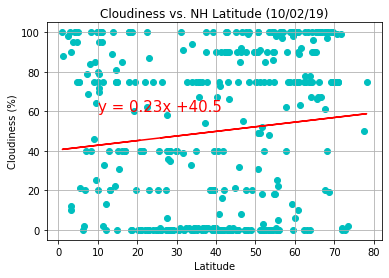

In [96]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values,color="c")
plt.plot(x_values,regress_values,"r-")
plt.title("Cloudiness vs. NH Latitude (10/02/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Cloudiness vs NH Latitude.png")
plt.show()

# Northern Hemisphere --> Wind Speed vs. Latitude

The r-squared is: 0.23964313119827427


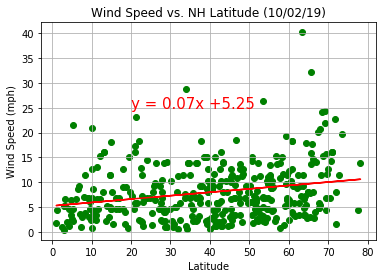

In [97]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Wind Speed vs. NH Latitude (10/02/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Wind Speed vs NH Latitude.png")
plt.show()

# Southern Hemisphere: Temperature, Humidity, Cloudiness, Wind Speed against Latitude

In [98]:
south_hem = weather_data.loc[(weather_data["Lat"] < 0)]
south_hem = pd.DataFrame(south_hem)
south_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1570048732,86,-23.12,-134.97,61.86,10.13
3,Bluff,0,AU,1570048766,76,-23.58,149.07,62.32,14.56
4,Hobart,0,AU,1570048546,66,-42.88,147.33,53.01,9.17
10,Cabedelo,0,BR,1570048987,61,-6.97,-34.84,80.60,9.17
11,Kaitangata,100,NZ,1570048799,69,-46.28,169.85,46.99,4.00
...,...,...,...,...,...,...,...,...,...
539,Macusani,100,PE,1570049197,84,-14.07,-70.43,39.03,9.22
541,Fougamou,88,GA,1570049198,88,-1.22,10.59,73.61,3.87
548,Port Hedland,0,AU,1570048883,64,-20.31,118.58,71.60,8.05
552,Palu,77,ID,1570049202,91,-0.90,119.87,72.51,3.78


# Southern Hemisphere -->Temperature vs. Latitude

0      65.922253
3      65.615461
4      52.743536
10     76.693320
11     50.475943
         ...    
539    71.958052
541    80.528220
548    67.796352
552    80.741641
553    69.623765
Name: Lat, Length: 177, dtype: float64
y = 0.67x +81.34
The r-squared is: 0.7321080526324739


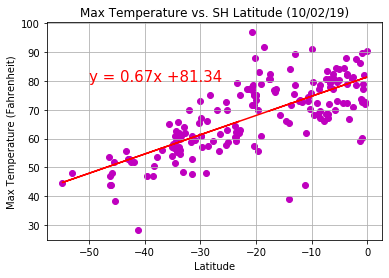

In [99]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature vs. SH Latitude (10/02/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Max Temperature vs SH Latitude.png")
plt.show()

# Southern Hemisphere --> Humidity vs. Latitude

The r-squared is: 0.12162108976058134


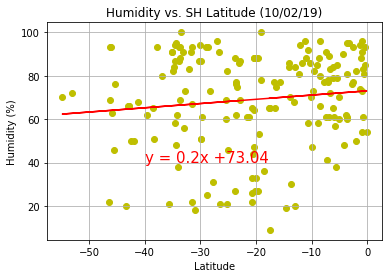

In [100]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. SH Latitude (10/02/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Humidity vs SH Latitude.png")
plt.show()

# Southern Hemisphere --> Cloudiness vs. Latitude

The r-squared is: 0.04311432634051328


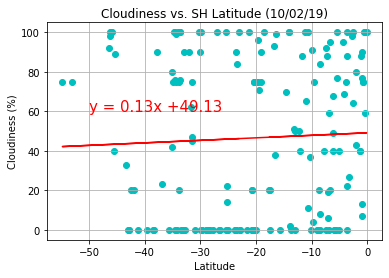

In [101]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values,color="c")
plt.plot(x_values,regress_values,"r-")
plt.title("Cloudiness vs. SH Latitude (10/02/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Cloudiness vs SH Latitude.png")
plt.show()

# Southern Hemisphere --> Wind Speed vs. Latitude

The r-squared is: -0.23489204364149135


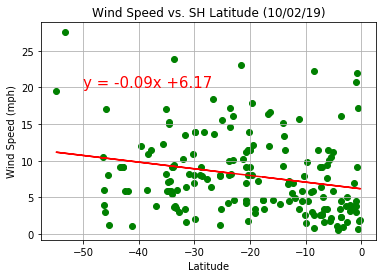

In [102]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Wind Speed vs. SH Latitude (10/02/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Wind Speed vs SH Latitude")
plt.show()